<a href="https://colab.research.google.com/github/joyeeta-19/image-classification-using-distributed-SVM/blob/main/distributed_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.its.dal.ca/apache/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!tar xvf spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("ImageAnnotation")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-05-23 05:41:23--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.204.138.61, 54.159.163.191, 52.200.57.5, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.204.138.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  35.9MB/s    in 0.4s    

2021-05-23 05:41:23 (35.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


In [ ]:
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://6f50dc980ef2.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://6f50dc980ef2.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


#importing the dataset

In [ ]:
!unzip '/content/drive/MyDrive/lsdp/mnist.zip' -d '/content/drive/MyDrive/lsdp/dataset'

Archive:  /content/drive/MyDrive/lsdp/mnist.zip
  inflating: /content/drive/MyDrive/lsdp/dataset/mnist  


In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

fileName = "/content/drive/MyDrive/lsdp/dataset/mnist"
textDF = sqlContext.read.text(fileName)

In [ ]:
#Complete the #FILL IN# gaps

# 1. Show the first 10 lines of the DF
textDF.show(10)
# 2. Number of lines
n_lines = textDF.count()
print('Number of lines: ',n_lines)
# 3. Content of the first line
line = textDF.take(1)
print('First line content:',line)

+--------------------+
|               value|
+--------------------+
|5 153:3 154:18 15...|
|0 128:51 129:159 ...|
|4 161:67 162:232 ...|
|1 159:124 160:253...|
|9 209:55 210:148 ...|
|2 156:13 157:25 1...|
|1 125:145 126:255...|
|3 152:38 153:43 1...|
|1 153:5 154:63 15...|
|4 135:189 136:190...|
+--------------------+
only showing top 10 rows

Number of lines:  60000
First line content: [Row(value='5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35

In [ ]:
fileName = "/content/drive/MyDrive/lsdp/dataset/mnist"
dataDF = spark.read.format("libsvm").option("numFeatures", "784").load(fileName)

In [ ]:
dataDF.show(5)
# 2. Number of lines
n_lines = dataDF.count()
print('Number of lines: %d' %n_lines)
# 3. Content of the first line: extracting the label and the features
line = dataDF.take(1)
print('Label: %d' %line[0].label)
print('Features: %s' %line[0].features)

# Feature data type
print(type(line))

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Number of lines: 60000
Label: 5
Features: (784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[

#data analysis

In [ ]:
import matplotlib.pyplot as plt
from pyspark.mllib.linalg import Vectors

def plot_data(images, h, w, n_row=1, n_col=10):

    fig = plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(len(images)):
        plt.subplot(n_row, n_col, i + 1)      
        try: # In the case each element of "images" is a row data with a variable "features" 
            img = images[i].features.toArray()
        except: # In the case each element of "images" is directly the pixel values
            img = images[i]
            
        plt.imshow(img.reshape((h, w )), cmap=plt.cm.jet)
        plt.xticks(())
        plt.yticks(())
    return fig

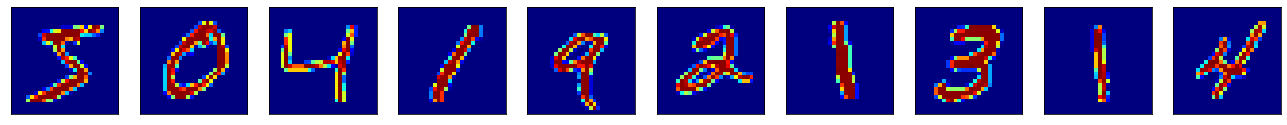

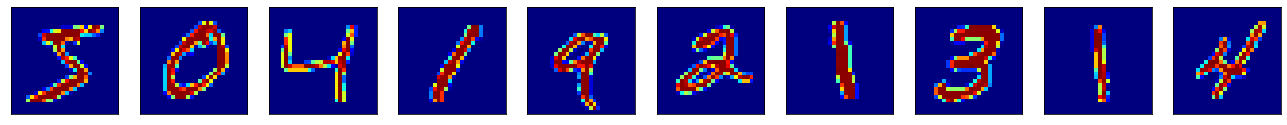

In [ ]:
h= 28
w =28

# Pick up 10 images and plot them using the function  plot_data()
images = dataDF.take(10)
fig = plot_data(images, h, w)
display(fig)

#data preprocessing : normalization

In [ ]:
from pyspark.ml.feature import StandardScaler

# Define the normalizer object: indicate that you only want each feature to have unit standard deviation. Use the nomenclature "normFeatures" for column with the output normalized features.
scaler = StandardScaler(inputCol="features", outputCol="normFeatures", withStd=True, withMean=False)

# Fit the StandardScaler: learn the statistics of the data
scalerModel = scaler.fit(dataDF)

# Normalize the data: apply the normalization transformation
scaledData = scalerModel.transform(dataDF)

# For the first data: compare the first 10 original features with the normalized ones
firstData = scaledData.first()
print(firstData.features)
print(firstData.normFeatures)

(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.

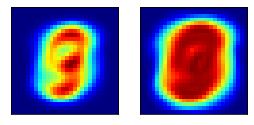

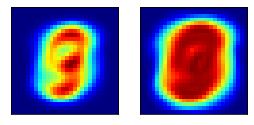

In [ ]:
meanValues = scalerModel.mean
stdValues= scalerModel.std

# Plot these values
fig = plot_data([scalerModel.mean,scalerModel.std] , h, w)
display(fig)

#preparing training and testing dataframe

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

train, test = data.randomSplit([0.8, 0.2], seed=12345)

In [ ]:
print(train.count())

47887


In [ ]:
print(test.count())

12113


In [ ]:
from pyspark.sql.functions import *

# Create the training data DF
trainDF = scaledData.select(col("label"), col("normFeatures").alias("features"))

# Examine the resulting DF
trainDF.show(5)
trainDF.first()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows



Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348:

In [ ]:
fileName = "/content/drive/MyDrive/lsdp/dataset/mnist"
dataTestDF =  spark.read.format("libsvm").option("numFeatures", "784").load(fileName)
# Normalize the test data
scaledDataTest = scalerModel.transform(dataTestDF)
# Create the test DF
testDF = scaledDataTest.select(col("label"), col("normFeatures").alias("features"))

# Examine the resulting DF
testDF.show(10)
testDF.first()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
|  2.0|(784,[155,156,157...|
|  1.0|(784,[124,125,126...|
|  3.0|(784,[151,152,153...|
|  1.0|(784,[152,153,154...|
|  4.0|(784,[134,135,161...|
+-----+--------------------+
only showing top 10 rows



Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348:

In [ ]:
fileName = "/content/drive/MyDrive/lsdp/dataset/mnist"
dataTestDF =  spark.read.format("libsvm").option("numFeatures", "784").load(fileName)
# Normalize the test data
scaledDataTest = scalerModel.transform(dataTestDF)
# Create the test DF
testDF = scaledDataTest.select(col("label"), col("normFeatures").alias("features"))

# Examine the resulting DF
testDF.show(10)
testDF.first()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
|  2.0|(784,[155,156,157...|
|  1.0|(784,[124,125,126...|
|  3.0|(784,[151,152,153...|
|  1.0|(784,[152,153,154...|
|  4.0|(784,[134,135,161...|
+-----+--------------------+
only showing top 10 rows



Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348:

#performing SVM classification

In [ ]:
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define your binary classifier
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Define the One Vs All Classifier.
ovr = OneVsRest(classifier=lsvc)

# train the multiclass model.
lsvm = ovr.fit(trainDF)
#lsvm.save("/content/drive/MyDrive/lsdp")
# score the model on test data.
# Show the computed predictions and compare with the original labels

predictions = lsvm.transform(testDF)
predictions.select("features", "label", "prediction").show(10)

# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator =  MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions) 

# Show the accuracy
print("Test accuracy = ", (accuracy))

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[152,153,154...|  5.0|       3.0|
|(784,[127,128,129...|  0.0|       0.0|
|(784,[160,161,162...|  4.0|       4.0|
|(784,[158,159,160...|  1.0|       1.0|
|(784,[208,209,210...|  9.0|       9.0|
|(784,[155,156,157...|  2.0|       2.0|
|(784,[124,125,126...|  1.0|       1.0|
|(784,[151,152,153...|  3.0|       3.0|
|(784,[152,153,154...|  1.0|       1.0|
|(784,[134,135,161...|  4.0|       4.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy =  0.8568


In [ ]:
df_predict = predictions
df_predict

,label,features,rawPrediction,prediction
0,5.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9702221855403417,-2.7112188076889305,-2.53...",3.0
1,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.2356454846910436,-2.951772841298057,-2.1680...",0.0
2,4.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.612167129253667,-2.496231538596853,-1.7010...",4.0
3,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.254227023540711,0.8582908600662574,-1.3239...",1.0
4,9.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.8457701639059407,-1.9886842346737386,-2.81...",9.0
...,...,...,...,...
59995,8.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.1842554343047627,-2.179997210706946,-1.346...",8.0
59996,3.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.642881362268413,-2.3390384707937426,-0.914...",3.0
59997,5.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.0307460560439576,-2.6841762769214275,-3.22...",5.0
59998,6.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6875321297819782,-2.7277052976823537,-1.36...",6.0


In [ ]:
df_predict.to_csv("/content/drive/MyDrive/lsdp/dataset/predict.csv")

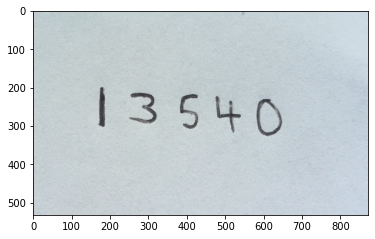

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

num = cv2.imread("/content/drive/MyDrive/lsdp/dataset/digit.jpg")
plt.imshow(num)
#print(img)
# img_arr=image.flatten()
# print(img_arr)
# features = (784,img_arr)
# #print(np.array(features))

[555  22 493  22 534  50 206  34 499  19  97  34 511   3 241  46 246 235
 531  19 537  19 531  25 537  25 492  19 490 235 498  11 490 227  73  49
 151   3  59  33 235  47 117  40  83  40 263  11 735 226 110  46 249   1
 641   9 237 242  84  42 255  12 402   3 244 243 149  36 253   1 251   2
 147   1 505   3 397   1   4 236 490  13  81  42 110  35 151   6  85  97
 247   1  89  39 487   9  84  70  69  48  97  79  60  22 151  32 376  60
  58  27 146  28 244  10 164  31  72  34 394  49 370  82 735 219 491   1
 505  11 159  40 157  40 350  33 493 235 249 234 118  30 533  90 144  31
 412 189  78  35 111  53 144  48 490 220 293  95 248  12 650  77  72  39
 106  36 241  12 126  53 122  53 636  10 482   6 250 243 537 198 495 243
 141   4 481 241 726 241 489 243 543 116 496   5 658  73 115  53 552 119
 629 130]


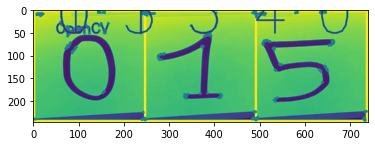

In [ ]:
#img = cv2.imread('img1.jpg')
gray = cv2.cvtColor(num,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 1)
                              
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    res = cv2.circle(num, (x,y), 3, (255, 0, 255), -1)

plt.imshow(gray)

features = corners.flatten()
print(features)

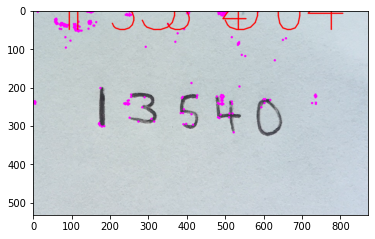

In [ ]:
# font
font = cv2.FONT_HERSHEY_SIMPLEX  
# org
org = (50, 50)
# fontScale
fontScale = 6
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.putText() method
res_img = cv2.putText(res, '1 3 3 4 0', org, font, fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(res_img)

# **** feature extraction ****

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


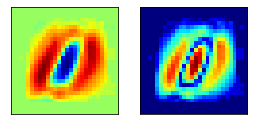

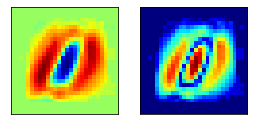

In [ ]:

import numpy as np
from scipy.stats import t


# Collect the training data 
trainingData = trainDF.take(1000)

# Get the features of the data belonging to class 0, compute its mean 
data0 = np.array([data.features for data in trainingData if data.label==0])
mean0 = np.mean(data0, axis=0)

# Get the features of the data belonging to class 1, compute its mean 
data1 = np.array([data.features for data in trainingData if data.label==1])
mean1 = np.mean(data1, axis=0)

# Compute common variance
std_common = np.std(np.concatenate((data0 ,data1)), axis=0)
# Compute the number of data per class
N0 = data0.shape[0]
N1 = data1.shape[0]

# Compute t-values 
t_values= np.divide((mean0-mean1), np.sqrt(1./N0 + 1./N1)*std_common)
# Solving nan problems (some pixels are constant for all the data, so their means are 0, its std its 0 and its t_value is nan)
t_values[np.isnan(t_values)]=0
fig = plot_data([t_values,np.abs(t_values)], h, w)
display(fig)
pos_relevant = np.argsort(np.abs(t_values))[::-1]
pos_sel = pos_relevant[:200]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


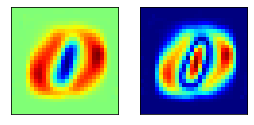

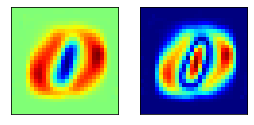

In [ ]:
from pyspark.ml.feature import StandardScaler
import numpy as np

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

trainDF_0 = trainDF.filter(trainDF.label==0)
trainDF_1 = trainDF.filter(trainDF.label==1)
scalerModel_0 = scaler.fit(trainDF_0)
scalerModel_1 = scaler.fit(trainDF_1)
scalerModel_all = scaler.fit(trainDF)
mean_0 = np.array(scalerModel_0.mean)
mean_1 = np.array(scalerModel_1.mean)
std_common_ = np.array(scalerModel_all.std)
N_0 = trainDF_0.count()
N_1 = trainDF_1.count()

# Compute t-values 
t_values_= np.divide((mean_0-mean_1), np.sqrt(1./N_0 + 1./N_1)*std_common_)
# Solving nan problems (some pixels are constant for all the data, so their means are 0, its std its 0 and its t_value is nan)
t_values_[np.isnan(t_values_)]=0

# We can plot the t_values and their absolute values
fig = plot_data([t_values_,np.abs(t_values_)], h, w)
display(fig)

# Ranking t-values
# The most discriminating pixels have very large or very small t values, so we rank over their absolute value
# np.argsort ranks in ascending order, so we invert the result to have the most discriminative pixels in the first positions
pos_relevant_ = np.argsort(np.abs(t_values_))[::-1]

# We select the 200 most relevant pixels and built the new data set
pos_sel_ = pos_relevant_[:200]


In [ ]:
print(pos_sel_)

[406 434 358 378 386 357 385 462 330 414 329 413 483 511 461 379 350 351
 455 433 489 482 539 441 510 407 359 427 454 301 323 387 442 302 405 469
 399 428 490 331 400 426 538 512 456 484 567 540 468 415 372 496 440 273
 568 517 300 345 412 328 373 272 384 470 356 318 523 435 481 497 371 317
 344 290 550 495 398 291 524 453 322 263 346 401 509 443 566 577 244 551
 596 522 274 303 549 578 262 319 377 595 467 289 245 235 425 316 429 295
 236 343 597 488 498 264 537 243 525 516 374 370 569 271 552 576 605 518
 471 494 604 457 579 324 208 439 292 215 216 463 234 460 521 299 347 261
 541 397 594 352 485 207 246 625 606 288 360 388 624 513 315 565 598 402
 214 626 209 411 327 545 217 275 342 526 296 416 553 603 548 237 355 627
 580 383 623 466 332 242 499 544 380 628 186 320 180 206 349 607 444 187
 233 185]


In [ ]:
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define your binary classifier
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Define the One Vs All Classifier.
ovr = OneVsRest(classifier=lsvc)

# train the multiclass model.
lsvm = ovr.fit(trainDF_0)
lsvm.save("")
# score the model on test data.
predictions = ovrModel.transform(dataTestDF)

# Show the computed predictions and compare with the original labels
predictions.select("features", "label", "prediction").show(10)

# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator =  MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions) 

# Show the accuracy
print("Test accuracy = ", (accuracy))

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[152,153,154...|  5.0|       0.0|
|(784,[127,128,129...|  0.0|       0.0|
|(784,[160,161,162...|  4.0|       0.0|
|(784,[158,159,160...|  1.0|       0.0|
|(784,[208,209,210...|  9.0|       0.0|
|(784,[155,156,157...|  2.0|       0.0|
|(784,[124,125,126...|  1.0|       0.0|
|(784,[151,152,153...|  3.0|       0.0|
|(784,[152,153,154...|  1.0|       0.0|
|(784,[134,135,161...|  4.0|       0.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy =  0.09871666666666666
